In [9]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [4]:
data = pd.read_csv("/home/stranger/Desktop/Heart_Disease_Project/results/cleaned_heart_disease.csv")

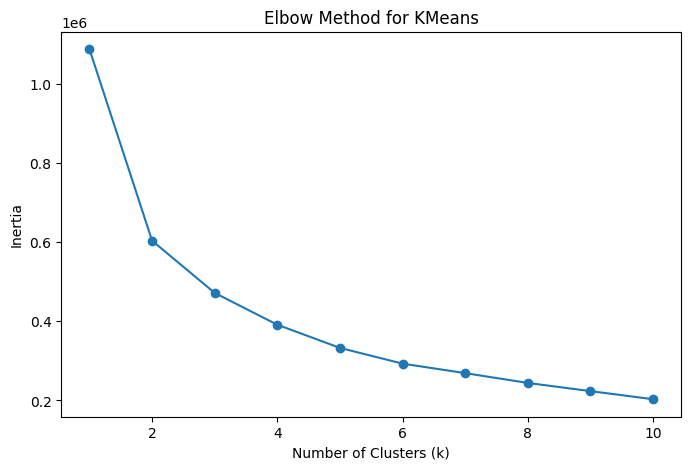

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

X_unsupervised = data.drop("target", axis=1)


inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_unsupervised)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()





     

KMeans ARI: 0.036, Silhouette Score: 0.389


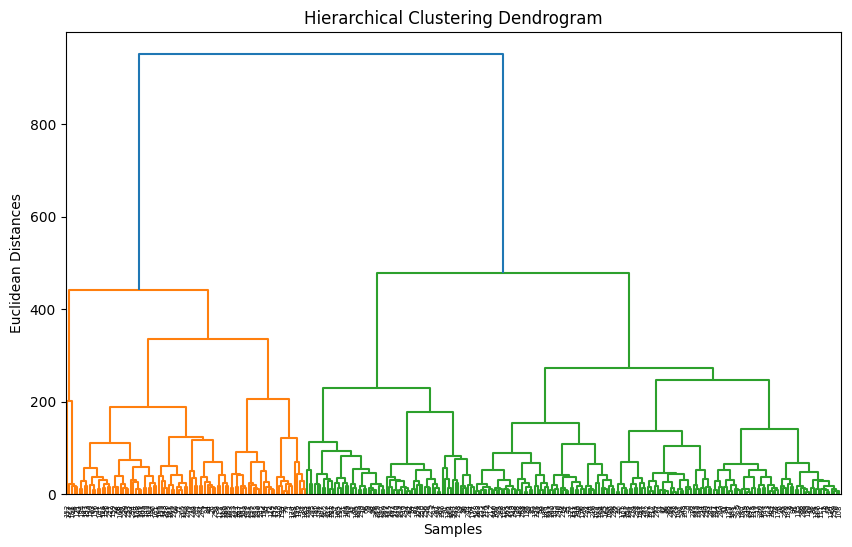

In [6]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_unsupervised)


ari_kmeans = adjusted_rand_score(data["target"], clusters)
silhouette_kmeans = silhouette_score(X_unsupervised, clusters)
print(f"KMeans ARI: {ari_kmeans:.3f}, Silhouette Score: {silhouette_kmeans:.3f}")


plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_unsupervised, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distances")
plt.show()

In [7]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X_unsupervised)

In [8]:
ari_hc = adjusted_rand_score(data["target"], hc_clusters)
silhouette_hc = silhouette_score(X_unsupervised, hc_clusters)
print(f"Hierarchical Clustering ARI: {ari_hc:.3f}, Silhouette Score: {silhouette_hc:.3f}")

Hierarchical Clustering ARI: 0.065, Silhouette Score: 0.386
